In [2]:
import pandas as pd

In [7]:
ds = pd.read_csv("C:/Users/Usuario/Documents/PortfolioAI/Prediction/healthcare.csv")

In [8]:
ds

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [15]:
ds['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [18]:
ds['hypertension'].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

In [19]:
ds['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [20]:
ds['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [22]:
ds['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [23]:
ds['avg_glucose_level'].value_counts()

avg_glucose_level
93.88     6
91.68     5
72.49     5
91.85     5
84.10     5
         ..
73.73     1
77.88     1
78.03     1
205.26    1
185.27    1
Name: count, Length: 3979, dtype: int64

In [25]:
ds['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [26]:
ds['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [27]:
ds.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [28]:
ds.duplicated().sum()

np.int64(0)

### Clean data

In [42]:
ds = ds.drop(columns='id')

In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

ds['gender'] = label_encoder.fit_transform(ds['gender'])
ds['ever_married'] = label_encoder.fit_transform(
    ds['ever_married'])
ds['work_type'] = label_encoder.fit_transform(ds['work_type'])
ds['Residence_type'] = label_encoder.fit_transform(
    ds['Residence_type'])
ds['smoking_status'] = label_encoder.fit_transform(
    ds['smoking_status'])

In [39]:
from sklearn.impute import KNNImputer


knn_imputer = KNNImputer(n_neighbors=3)

imputed_data = knn_imputer.fit_transform(ds[['bmi']])
ds['bmi'] = imputed_data

In [43]:
ds

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [44]:
ds.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Train model

In [45]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

<Axes: ylabel='bmi'>

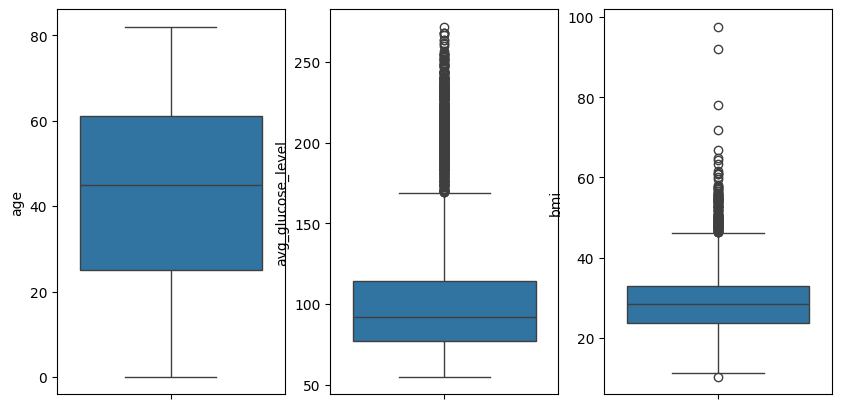

In [47]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=ds['age'])

plt.subplot(1, 3, 2)
sns.boxplot(data=ds['avg_glucose_level'])

plt.subplot(1, 3, 3)
sns.boxplot(data=ds['bmi'])

In [48]:
Q1 = np.percentile(ds['avg_glucose_level'], 25)
Q3 = np.percentile(ds['avg_glucose_level'], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

(ds['avg_glucose_level'] > upper_bound).value_counts()

avg_glucose_level
False    4483
True      627
Name: count, dtype: int64

In [49]:
mean = ds['avg_glucose_level'].mean()
ds.loc[ds['avg_glucose_level']
              < lower_bound, 'avg_glucose_level'] = mean
ds.loc[ds['avg_glucose_level']
              > upper_bound, 'avg_glucose_level'] = mean


(ds['avg_glucose_level'] > upper_bound).value_counts()

avg_glucose_level
False    5110
Name: count, dtype: int64

In [51]:
Q1 = np.percentile(ds['bmi'], 25)
Q3 = np.percentile(ds['bmi'], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

(ds['bmi'] > upper_bound).value_counts()

bmi
False    4985
True      125
Name: count, dtype: int64

In [52]:
(ds['bmi'] < lower_bound).value_counts()

bmi
False    5109
True        1
Name: count, dtype: int64

In [55]:
ds.drop(ds[ds['bmi'] > upper_bound].index, inplace=True)
ds.drop(ds[ds['bmi'] < lower_bound].index, inplace=True)

In [56]:
(ds['bmi'] < lower_bound).value_counts()

bmi
False    4984
Name: count, dtype: int64

In [57]:
ds.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,106.147677,36.600000,1,1
1,0,61.0,0,0,1,3,0,106.147677,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.920000,32.500000,2,1
3,0,49.0,0,0,1,2,1,106.147677,34.400000,3,1
4,0,79.0,1,0,1,3,0,106.147677,24.000000,2,1


<Axes: xlabel='stroke'>

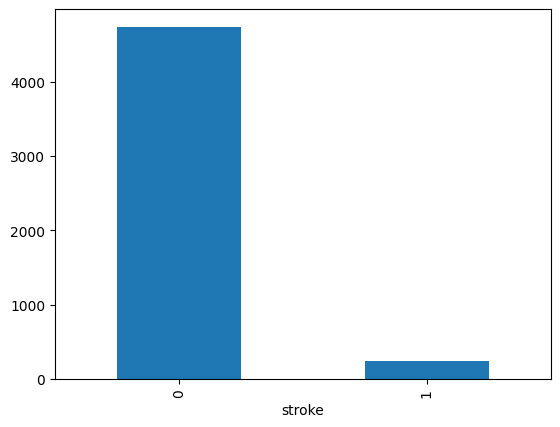

In [58]:
ds['stroke'].value_counts().plot(kind='bar')

<Axes: xlabel='stroke'>

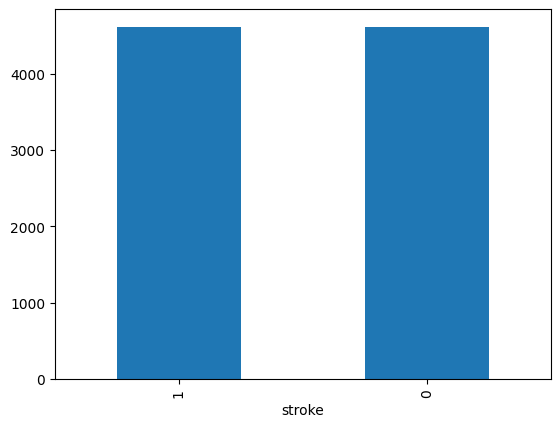

In [60]:
smote = SMOTE(random_state=42)
col = ['gender', 'age', 'hypertension', 'heart_disease','ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
sm_feature, sm_target = smote.fit_resample(ds[col], ds['stroke'])
df_smote = pd.DataFrame(sm_feature, columns=col)
df_smote['stroke'] = sm_target

ds['stroke'] = df_smote['stroke']

df_smote['stroke'].value_counts().plot(kind='bar')

In [61]:
X = ds.drop(['stroke'], axis=1)
y = ds['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)